## Overview
1. load Home and Kitchen data
2. select reviewers who left more than 5 reviews (115,673)
3. light preprocessing
4. max sentence length(128)에 맞춰서 reviewText 저장

In [1]:
import gzip
import nltk
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import re

from tqdm import tqdm

pd.set_option('display.max_colwidth', 600)
%matplotlib inline

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

data = getDF('reviews_Home_and_Kitchen.json.gz')

## 1. Preprocessing

* 시간 순 정렬
* 최소한의 리뷰 개수 이상인 데이터만 거르기

In [3]:
def left_reviewerId_over_n(data, n):
    reviewer_dict = dict()
    for id_ in data.reviewerID:
        if reviewer_dict.get(id_): 
            reviewer_dict[id_] += 1
        else:
            reviewer_dict[id_] = 1
    over_n = []
    for id_, cnt in reviewer_dict.items():
        if cnt >= n:
            over_n.append(id_)
    return over_n

In [4]:
n = 5

In [5]:
reviewer_over_n = left_reviewerId_over_n(data, n)
print("reviewer whose number of reviews is over n: {}".format(len(reviewer_over_n))) # reviewer 수

reviewer whose number of reviews is over n: 115673


In [6]:
data_over_n = data[data.reviewerID.isin(reviewer_over_n)]

In [7]:
data_over_n.sort_values('unixReviewTime', inplace=True)

/home/jihyung/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
print("number of items in data_over_n: {}".format(len(set(data_over_n.asin))))

number of items in data_over_n: 194446


In [9]:
del(data)

### 1.1 text word indexing

In [10]:
lemma = nltk.wordnet.WordNetLemmatizer()

In [11]:
stemmed_review = []
for review in tqdm(data_over_n.reviewText):
    review = re.sub('\*+', '', review)
    review = re.sub('~+', '', review)
    review = re.sub('-+', '', review)
    review = re.sub('&quot;', '', review)
    review = re.sub('\&\#\d+\;', ' ', review)
    review = re.sub('_+', '', review)
    review = re.sub('([a-zA-Z]+)\.([a-zA-Z])', '\\1. \\2', review)
    stemmed = lemma.lemmatize(review)
    stemmed_review.append(stemmed)

100%|██████████| 980608/980608 [01:05<00:00, 14913.22it/s]


In [12]:
cnt = 0
while cnt < len(stemmed_review):
    review = stemmed_review.pop(0)
    review = re.sub('theprimula', 'the primula', review)
    review = re.sub('thicknessit', 'thickness it', review)
    review = re.sub('perfmance', 'performance', review)
    review = re.sub('brakfakst', 'breakfast', review)
    review = re.sub('readingsand', 'readings and', review)
    review = re.sub('appletinis', 'appletin is', review)
    review = re.sub('makerhas', 'maker has', review)
    review = re.sub('durablegood', 'durable good', review)
    review = re.sub('spacenegative', 'space negative', review)
    review = re.sub('beveragecons', 'beverage cons', review)
    review = re.sub('naturalnearby', 'natural nearby', review)
    review = re.sub('rugfeatured', 'rug featured', review)
    review = re.sub('cookingmeals', 'cooking meals', review)
    review = re.sub('againstallgrain', 'against all grain', review)
    review = re.sub('updatefirst', 'update first', review)
    review = re.sub('lotif', 'lot if', review)
    review = re.sub('sheetcakes', 'sheet cakes', review)
    review = re.sub('modelsrating', 'models rating', review)
    review = re.sub('versatilitycons', 'versatility cons', review)
    review = re.sub('frustrationcons', 'frustrations cons', review)
    review = re.sub('valueeasy', 'value easy', review)
    review = re.sub('puttoppings', 'put toppings', review)
    review = re.sub("don'tworry", "don't worry", review)
    review = re.sub('betterbut', 'better but', review)
    review = re.sub('fightersnice', 'fighters nice', review)
    review = re.sub('buttwhile', 'but while', review)
    review = re.sub('colderthan', 'colder than', review)
    review = re.sub('curtainsconsits', 'curtains cons its', review)
    review = re.sub('moppingalthough', 'mopping although', review)
    review = re.sub('receiversshelf', 'receivers shelf', review)
    review = re.sub('oldoak', 'old oak', review)
    review = re.sub('wasworried', 'was worried', review)
    review = re.sub('myaroma', 'my aroma', review)
    review = re.sub('thereplaicing', 'the replacing', review)
    review = re.sub('pleasingb', 'pleasing', review)
    review = re.sub('noisesturn', 'noises turn', review)
    review = re.sub('sanitizebuild', 'sanitize build', review)
    review = re.sub('andpulling', 'and pulling', review)
    review = re.sub('extractorinstead', 'extractor instead', review)
    review = re.sub('tocome','to come', review)
    review = re.sub('peppercombine', 'pepper combine', review)
    review = re.sub('ightweight', 'light weight', review)
    review = re.sub("ratingi've", "rating i've", review)
    review = re.sub('pilllowcase', 'pillow case', review)
    review = re.sub('toughbiggreenand', 'tough big green and', review)
    review = re.sub('smartypants', 'smarty pants', review)
    review = re.sub('metalworker', 'metal worker', review)
    review = re.sub('quiterealistic', 'quite realistic', review)
    review = re.sub('flimsyoverall', 'films overall', review)
    review = re.sub('shortervictorinox', 'shorter victorinox', review)
    review = re.sub('hungryhappenings', 'hungry happenings', review)
    review = re.sub('portableairshop', 'portable air shop', review)
    review = re.sub('elementis', 'elements', review)
    review = re.sub('designunder', 'design under', review)
    review = re.sub('adjustableinexpensivestainless', 'adjustable inexpensive stainless', review)
    review = re.sub('minutesbefore', 'minutes before', review)
    review = re.sub('breadbaking', 'bread baking', review)
    review = re.sub('somewhathigher', 'somewhat higher', review)
    review = re.sub('remotewith', 'remote with', review)
    review = re.sub('teapotthat', 'teapot that', review)
    review = re.sub('dishwashersafe', 'dishwasher safe', review)
    review = re.sub('paperthe', 'paper the', review)
    review = re.sub('grillpanthe', 'grill pan the', review)
    review = re.sub('setbonjour', 'set bonjour', review)
    review = re.sub('thewaiting', 'the waiting', review)
    review = re.sub('buyinghttp', 'buying http', review)
    review = re.sub('spacemy', 'space my', review)
    review = re.sub('asomething', 'a something', review)
    review = re.sub('mybonjour', 'my bonjour', review)
    review = re.sub('newlodge', 'new lodge', review)
    review = re.sub('lbsgross', 'lbs gross', review)
    review = re.sub('cleanupgive', 'clean up give', review)
    review = re.sub('teaupdate', 'tea update', review)
    review = re.sub('thefrench', 'the french', review)
    review = re.sub('eggwater', 'egg water', review)
    review = re.sub('rollerto', 'roller to', review)
    review = re.sub('thesecons', 'these cons', review)
    review = re.sub('fridgethe', 'fridge the', review)
    review = re.sub('overpricedthese', 'over priced these', review)
    review = re.sub('freshmakes', 'fresh makes', review)
    review = re.sub('slowwwlllllyy', 'slowly', review)
    review = re.sub('12below', '12 below', review)
    review = re.sub('installedto', 'installed to', review)
    review = re.sub('bagscons', 'bags cons', review)
    review = re.sub('vacuumwhcih', 'vacuum which', review)
    review = re.sub('ergonomicsfolds', 'ergonomics folds', review)
    review = re.sub('stationboth', 'station both', review)
    review = re.sub('gotthe', 'got the', review)
    review = re.sub('batteriescons', 'batteries cons', review)
    review = re.sub('bakerhttp', 'baker http', review)
    review = re.sub('getsmy', 'gets my', review)
    review = re.sub('myhoover', 'my hoover', review)
    review = re.sub('tacoproper', 'taco proper', review)
    review = re.sub("it'sonly", "it's only", review)
    review = re.sub('steelmeasures', 'steel measures', review)
    review = re.sub('technologypanasonic', 'technology panasonic', review)
    review = re.sub('spiritsdate', 'spirits date', review)
    review = re.sub('knowwhen', 'know when', review)
    review = re.sub('toturn', 'to turn', review)
    review = re.sub('gettingit', 'getting it', review)
    review = re.sub('filtersbrush', 'filters brush', review)
    review = re.sub('onereason', 'one reason', review)
    review = re.sub('gradeproduct', 'grade product', review)
    review = re.sub('handlesthe', 'handles the', review)
    review = re.sub('capthere', 'cap there', review)
    review = re.sub('warrantyyou', 'warranty you', review)
    review = re.sub('veggiesthere', 'veggies there', review)
    review = re.sub('deepupdated', 'deep updated', review)
    review = re.sub('betterthis', 'better this', review)
    review = re.sub('filtersthis', 'filters this', review)
    review = re.sub('sohelpful', 'so helpful', review)
    review = re.sub('absolutelya', 'absolutely a', review)
    review = re.sub('bladefor', 'blade for', review)
    review = re.sub('beachcamera', 'beach camera', review)
    review = re.sub('teawith', 'tea with', review)
    review = re.sub('properlyconsneeds', 'properly cons needs', review)
    review = re.sub('paintedcons', 'painted cons', review)
    review = re.sub('offlaking', 'off laking', review)
    review = re.sub('theset', 'the set', review)
    review = re.sub('thiseven', 'this even', review)
    review = re.sub('bitsthere', 'bits there', review)
    review = re.sub('siloconvert', 'silo convert', review)
    review = re.sub('riiiiight', 'right', review)
    review = re.sub('nicelywhen', 'nicely when', review)
    review = re.sub('easethis', 'ease this', review)
    review = re.sub('struggleoverall', 'struggle overall', review)
    review = re.sub('tubesuction', 'tube suction', review)
    review = re.sub('steamthe', 'steam the', review)
    review = re.sub('mustardsalt', 'mustard salt', review)
    review = re.sub('withbrownie', 'with brownie', review)
    review = re.sub('pricecons', 'price cons', review)
    review = re.sub('arrivedthe', 'arrived the', review)
    review = re.sub('asharpening', 'a sharpening', review)
    review = re.sub('andforefinger', 'and forefinger', review)
    review = re.sub('downnaturally', 'down naturally', review)
    review = re.sub('underneathsummary', 'underneath summary', review)
    review = re.sub('jusssst', 'just', review)
    review = re.sub('shoulderbags', 'shoulder bags', review)
    review = re.sub('pepperdirectionscook', 'pepper dirctions cook', review)
    review = re.sub('homemadecookiesandmore', 'homemade cookies and more', review)
    review = re.sub('favoritewest', 'favorite west', review)
    stemmed_review.append(review)
    cnt += 1

In [27]:
# add '.' to review
for i, review in tqdm(enumerate(stemmed_review)):
    if review.startswith('I recently upgraded from aGE Spacemaker XLwith the purchase of an LG overtherange microwave'):
        stemmed_review.pop(i)
        corrected = "I recently upgraded from aGE Spacemaker XL with the purchase of an LG overtherange microwave 2 cubic ft., black, item number: LMV208SB. the Good attractive to look at, matches my kitchen decor perfectly. large LCD display is easy to see and read. includes many advanced and basic settings. has an 'EZON' feature which allows you to start cooking instantly with the press of this button. has dedicated buttons for popcorn and hot dogs. door opens on its own, there isn't another button that you need to press like on other microwaves for the door. the price was exceptional and with Amazn's free shipping. I defy anyone to find another retailer that can match their price. comes with a 1year warranty and if LG is anything like GE (I have no idea) they won't bat an eye if you call them for service even when the appliance is a few years old More/Less. Arrows allow you to subtract or add time while the microwave is in operation. tells you when to turn over food, when you're defrosting. extra large cooking capacity, and with the wrack it nearly doubles in size 1100 watts of power. the Bad it is incredibly heavy and bulky (nearly 70 pounds), have at least 2 strong men who can lift it when you install it. the door makes a loud clunking sound when it closes. there isn't a 'quick cook' button like GE had, the closest this has is EZOn, however that automatically defaults to 30 seconds the unit. doesn't constantly keep beeping to remind you that your food is ready. sometimes foods tend to get slightly soggy when taken off the 'hold warm' setting. the rotation cannot be turned off if it is set to keep warm. it's doing a number on my plastic dishes that are microwave safe, they're slightly bending, however since they're so inexpensive I do not mind too much. the Ugly it is a beast to clean/keep clean. it is a fingerprint/dust magnet picks up streaks very quickly. it can pick up scratches very, very easily. the Exceptional the Soften button allows you to soften butter, icecream, cream cheese and even frozen juice with the cooking sensors. the microwave cooks everything to the perfect temp and then shuts off automatically, this is great for TV dinners. with the Reheat button you can quickly heat up anything and the microwave will bring it to the perfect temp without any effort on your part dedicated. defrost settings for vegetables, beef and chicken with the Hold Warm button. I can now leave whatever I was cooking in it for up to 90 minutes and it will stay nice and hot, this'll save on power because I won't have to turn on the oven for this. able to automatically turn on the Hold Warm feature to follow another cooking function. EZOn feature can be extended in 30 second increments just by pressing it. Custom Cook can be programmed to cook any single time you use the most often (my only complaint about this is you still need to press the Start/Enter button). Things to Remember never use a brillo pad or abrasive sponge on this as it could scratch very easily. although I don't know why you would want to, never turn the microwave oven on if nothing is inside it. when you first get it, sometimes it makes slight crackling sounds as it's in operation, these are normal when this arrives. it will look HUGE in the manufacturer's box, don't worry that's just how it looks in the box. If anyone has any suggestions on how to keep this looking perfect and nice and shiny and glossy please let me know."
        stemmed_review.insert(i, corrected)
    elif review.startswith('This Microwave oven gets my highest rating even though Amazon only allows for five stars'):
        stemmed_review.pop(i)
        corrected = "This Microwave oven gets my highest rating even though Amazon only allows for five stars. the oven is extremely fast and has the largest capacity for the price, also the quietest microwave oven I have ever heard or owned. I am amazed at the speed of cooking and reheating it can do and Amazon has the best and lowest price of any website I researched on. oven has a clock which was not stated on the description on the amazon page where it is located on. there is however downfall to this microwave oven which I was very surprised to. have witnessed for such an innovator of this type of oven they are known for their carousel that it did not have a luud beep when the oven is finished cooking or reheating. you really have to be in a room that is very quiet to hear this beeping sound for when the oven is finished. but all in all great oven great price and lots of cooking and reheating settings and loads of interior space. I was even able to put a Visions cookware pot in there without damaging the sides of the oven while the turntable is in motion which I thought I would not be able to do prior to receiving the oven. I did have a concern that I would not be able to use this particular pot in there because of damage it could cause. but I was pleasantly surprised I was able to put it in this oven If you own a lower wattage microwave oven and you purchase this one. you will also need to adjust your times by at least half the amount you already use on your current oven. I also love the minute plus setting, if you make a mistake in your time you can press this button to add one more extra minute. everytime until you reach the desired time, it is very handy if you are not sure just how much more time you need with your cooking and don't want to have to go all through the steps again to reset and start over. this button is so easy. just one press and you get an extra minute. I completely recommend this Microwave oven ot everyone, I just hope it last twenty years like my old Amana microwave did."
        stemmed_review.insert(i, corrected)
    elif review.startswith('this was very easy to put togetheri like the suction on itit is much better than'):
        stemmed_review.pop(i)
        corrected = "this was very easy to put together. i like the suction on itit is much better than my other dirt devil. it is easy to use pretty light weight. it glides across the floor easily. there are a few things i do not like. wish it had a light on it for when i am going under things. i am so used to every other machine i have has one but this one does not. the wand is a bit klunky to take out to use it. i keep hitting myself on the plastic part that holds the hose when it is upright. as for the dirt cup i have yet to find any machine that i do not get a bit dirty when i have to empty it. this one if i just remember to dump it every single time i use it. then it is not so bad but when it gets clogged up and i have to stick my hand in there to twist it apart and let the clog get out then it is a huge mess. it is a bit odd where the cord comes out from the machine too close to the bottom of it and i have to keep picking it up to be sure not to run over it. seems like it could have been up above the on button. that is another issue with this machine. you have to put your foot in front of it to flip it down to use it. why not just have the down pedal in the back? we rarely use the dusting part of it. i was so excited to try this feature because we have butternut walls and ceilings all over our house to my dismay this feature is kind of a pain and just easier to get out my dust mopi give it three stars because there are simply too many downsides to overlook and i hope they improve on these things. overall the suction is really good so for daily cleaning of my carpets it is great. i just have learned to not use the wand much or the dusting feature"
        stemmed_review.insert(i, corrected)
    elif review.startswith('have been using this mattress for a month nowlove it!one thing it will be hard to get used to not having'):
        stemmed_review.pop(i)
        corrected = "have been using this mattress for a month now love it! one thing it will be hard to get used to not having to flip it though. i admit i am a flipper and our last mattress was over ten years old and i was always flipping it hoping to move the sags around. but this one i do not think will end up sagging like the other one did. it has a higher coil count than my last one did. so far this one i have no complaints of any kind for being able to get a good nights sleep. I am able to sleep and not wake up with a back achei did have to get new sheets though. thought i already had ones for deep pockets but they were not deep enough for this oneone tiny complaint i do have. it is harder to change the sheets. the material on the box spring and bottom of the mattress stick to each other instead of kind of sliding around and i wish the fabric on the boxspring was not so thin or fabric paper like. oh our older boxspring it was more like a waterproof tarp type material and not a single rip in it after ten years. this one came with a couple small tears in it so when i change the sheets have to lift the mattress up and move it around since it does not slide back into place at all. it is a softer bed just like it says plushso if you are looking for firm this is not going to be that bed for you."
        stemmed_review.insert(i, corrected)
    elif review.startswith('I got this set in may this year after much research and knowing that using nonstick cookware over yearsssss can lead to cancer ..'):
        stemmed_review.pop(i)
        corrected = "I got this set in may this year after much research and knowing that using nonstick cookware over yearsssss can lead to cancer. horrible and that too my nonstick started to loose its coating and no wonder it would be going directly into the food we eat. it was at that point where i decided to go with MCP stuff. i chose MCP instead of classic because i felt MCP set is more suitable for my cooking, since we almost cook everyday and when u weigh the MCP in one hand and classic in other hand. u could feel MCP is a bit heavier and so bit better. anyways that how i feel. one of my aunt said the heavier the pan the better it gets. so i ordered on amazon for 218 bucks and started using immediately, i just spray pam on the sautee pans and throw in some veggies and spray a spritz of olive oil over veggies and set in medium heat and they get done so perfectly and EVENLY. i love that it cooks food so evenly, unlike my other nonstick stuff and also the lids are quite handy. only thing you cannot rise heat more than medium unless you are boiling water. but that's no biggie for me. i got used to it. since once the pan is heated it cooks fast even in medium. i just love the steamer attachment. it gives me such perfectly steamed veggies and i use little pan for eggs and cleaning is unbelievable, i am some one who always dumps every small thing in a dish washer but coming to MCP set i clean it myself. it's that easy. i just put a drop of dishwasher detergent on the pan and fill it with HOT water and come back when ever i am passing by the kitchen and just rinse it away and every things washes away no matter how much tough marks or stains it has and it shines like those cook wares shown in cook shows. sometimes i forget to wash that day and wash the next day ot day after but it comes out just perfect when ever you wash. in fact you can proudly display them in the kitchen."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I am not Italian, nor have I ever had much interest in pasta...Well I always bought it out of a bag at the grocery store ,it wasn't to good to my palate or my friends..."):
        stemmed_review.pop(i)
        corrected = "I am not Italian, nor have I ever had much interest in pasta. Well I always bought it out of a bag at the grocery store, it wasn't to good to my palate or my friends. so I am learning to make fresh pasta. the problem is not the machine as it is a solid piece of metal and does what it says it will do. the problem is with me making the dough. however you must be able to make a dough that will work. ha ha. I am working on that. The machine is made of good steel and works well. will last a long time. I will be able to make a dough soon that will work. the dough that I tried was a water and all purpose flour to make ravoli it broke in the ravoli maker I bought also. but think my dough would have worked for everything else the machine does. Hey I am not putting this machine down as it is constructed of heavy metal and will last me a lifetime and pass on to kids and then to grandkids. the pasta maker is not the problem. I need to learn to make a dough. I have bought many items from Amazon. I think if you love to cook like I do you cannot go wrong with this machine as it is awesome, and does what it says it will do. I have had some pasta from it and fresh is better. who knew. I did't. sorry. don't know what to call the stuff I made as it was like a spaghetti as the strands were thicker and then I made an  angel hair I think. fresh is better and I am not Italian. I live in the south and have begun to think of ways to make dumplings or maybe some apple pies. hey this thing is awesome and let the mind take you away to a food frenzy of delight only your pocket book will stop you cold. but this item is priced right as it will last a long time. I haved told you my experience with the machine I bought and my expectations. yours may be different. but I am totally happy with my purchase."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I got this after I read all these good reviews..well sorry to say i ain't to pleased with mine..i tried cooking a inch an a half fat polishsausage.."):
        stemmed_review.pop(i)
        corrected = "I got this after I read all these good reviews. well sorry to say i ain't to pleased with mine. i tried cooking a inch an a half fat polishsausage. well these things barely fit on the rollers and scraped the heating element on top. needless to say i didn't get to try them out anhad to take them off. So i had some foot long nathan's hot dogs in the fridge and figured i try them. well they fit and turned easy and i followed there instuctionson how to cook them. but they came out tuff and all dried out not plump and juicy. i have a cheap hot dog roller by nostalgia that does a betterjob than this thing. you see on that thing the ROLLERS get hot and cook the dogs. on this thing the heating element on top bakes them and therollers just turn the dog around. it makes a hell of alot of difference believe me, I should have just went with a hot dog roller machine insteadof this thing. as far as the griddle goes this thing gets EXTREMELY HOT so i'm sure it would be good for steaks an what not. But i bought it for the hot dog thing and am really disappointed in that part. so don't think you can cook any kind of round sausage on this thingcause you can't. forget the bratwursts and the polishs, and the italian sausages and any other kind unless there less that a inch fat. i must saythough the clean up on it was a breeze came clean with a scrubber pad no problems. all in all if your looking for something to cook sausages onthis ain't it. if your looking for a smoking hot griddle this is your baby. any body want to buy a once used griddler grill cheap."
        stemmed_review.insert(i, corrected)
    elif review.startswith("OK ITS GREAT MAKES LARGE AND THIN FRIESITS MECHANICAL"):
        stemmed_review.pop(i)
        corrected = "OK ITS GREAT. MAKES LARGE AND THIN FRIESITS MECHANICA.L SO YOU HAVE TO PUSH THE HANDEL. YOU REALLY SHOULD MOUNT IT DOWN OR TO A WALLI USED RED POTATOES AND IT WORKED VERY WELL. REGULAR WHITE WORKED VERY WELL. HAVE NOT TRYED CARROTSOR OTHER THINGS LIKE IN MAKING A SOUPITS PART THAT PUSHES THE POTATO INTO THE CUTTERREALLY PUSHES IT ALL. THE WAY THREW YOU GOING TO HAVE TO PUT A DISH OR SOME THING TO COLLECT THE CUT FRIES ECTI. BELIVE ITS WELL MADE THE BLADES ARE N0T LIKE RAZORSHARP BUT GOOD ENONF FOR WHAT ITS IS FOR. DONT FORGET TO MOUNT IT DOWN. IT WILL WORK EASYER. I JUST HAVE NOT GOTTEN AROUND TO MOUNT IT DOWN YET ALSO. AMAZON SELLS A LITTLE SMALL DEEP FRYER THAT USES A CUP OF OILAND. I COOK EVERY THING IN IT WHITING FISH CAKESFRIES KIND OF EASY TO CLEAN. REMEMBER IT USES A CUP OF OIL SO YOU CAN CHANGE THE OIL OFTEN RATHER THAN THOES. BIG DEEP FRIERS THAT USE LIKE A HALF GALLON. IT ALSO HAS A TEMPUTURE SETTING. WELL IT JUST GOES WELL WITH THIS CUTTER. I MUST SAY WITH THESE TWO ITENS I COULD REALLY COOK UP A STORM. HAVE YOU EVER DEEP FRIED FISH CAKES OR FISH STICKS MADE A SANDWITCHWITH LETTUCE TOMATO MAYO KETCHUP OR BREADED SHRIMPPOP THEM. IN THIS DEEP FRYER I EVEN MADE BUTTERFLYSHRIMP WITH BACON IN IT. NOW THERE SOMETHING TRICKEY TO MAKE WELL. YOU'LL HAVE A BLAST WITH THESE ITEMSDEEP FRYED EGG ROLLS. WELL I GOT TO GOCHOW."
        stemmed_review.insert(i, corrected)
    elif review.startswith("They are so pretty and bright and neat and useful but when I got it the handle on the strainer was broken so I was sad so I told Amazon"):
        stemmed_review.pop(i)
        corrected = "They are so pretty and bright and neat and useful but when I got it the handle on the strainer was broken. so I was sad. so I told Amazon and they said do sorry we will send someone to get it from you and send another out. but print this label and I go oh no I had no printer. so I got sad again and I called and they said its OK the ups will bring it instead and I said yay and I was happy and my new one came and it was good and not broken. and later the ups came to get it and I said I have no tape either to close the box and he said its OK and he would tape it. so I was happy and then I tried the set. it was great too and bright and it all fits together perfect. and the only thing I wish it had too was a middle size bowl. but then something would be maybe left out or the big bowl would be to big or the little bowl too small. but they aren't and its awesome and if you want me to stop rambling just buy it and run around the complex of your tiny apartment showing all of your neighbors your awesome new kitchen set. and this out all of your old space taking up not fitting together crap or give it away like I did and be happy and have a free cabinet and get the magnetic utensil set and have a free kitchen drawer to put your towels and oven mitts in. so you can find them and have counter space!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("I have been sleeping on memory foam mattresses as soon as the knockoff ones were made.....my parents and grandparents both have"):
        stemmed_review.pop(i)
        corrected = "I have been sleeping on memory foam mattresses as soon as the knockoff ones were made. my parents and grandparents both have the expensive one that is advertised everywhere. but they have a larger budget than I do. .so I can tell you these mattresses are really evolving. that can be good and bad. technology can make things better for us, but sometimes things changing does not mean they are better. in fact sometimes they get worse. in this case, memory foam is evolving in a better way but the process to find the one for you is becoming more time consuming and frustrating. there are soooo many choices how do you know which foam is best?  1, 2 , 3 or 4 in?. gel infused?. regular foam?. 8,10 or 12 in?. I mean the choices are endless. and that is the part that gets to me. I spent nearly a total of 30 hours researching and comparing. and I know alot about these things. and it still took me that long. I can tell you my grandfather told me when I was a kid something I never forgot he said 'you spend 1/3 of your life sleeping, so you should make sure you find a good bed, it will help determine the quality of your life, health and happiness, so don't skimp on a good bed!'  He was right. but what is a good bed?  That is really up to each person. Here is what I did this time looking for a new mattress. 1.  Went to a mattress store.  Laid down on nearly all the mattresses and took notes.  I already knew I wanted a higher thickness like 12 inch, but I wanted to test the new gel infused beds, the latex beds and the expensive ones. then I tried the knockoffs. and wrote down my findings. I know sounds bizarre, but it works for me. it would not work for my husband he would just go in and buy the first one that felt good and we would have ended up spending nearly $2000.00 instead of $300.00. so that is why I go alone!!2.  I came home and did a search for 'what to know when buying a memory foam mattress.'  What this did is give me all the current information on the type of foams they are making now and what the specs are (what is the difference between a 3 inch and 4 inch foam?. what  is the difference between a 10 inch and 12 inch bed?. differences between densities of foam?). This them helped me determine that I wanted a bed to last longer than many beds, I need a firm bed for my back, hips, shoulders and knees, I wanted something that would keep the firmness yet provide support and be comfy. sounds like I wanted everything. oh yeah. and not break the bank!!. I learned that the higher the bed, the more likely it will last longer, the thicker the top layer of foam is with a density of at least 9, the longer the memory foam will stay firm. 3.  Now that I knew the type of bed I was looking for (firm, 12 inch height, 4 inch first layer of foam with a density of at least 9). .I went to Amazon to see what they had for sale. I found several. I then narrowed them down by price. from $200500. among these I looked at the reviews. and just because many people have purchased an item and it has several good reviews does not mean that is the best mattress. actually this one had the fewest people purchase it but the highest reviews out of those few people. so, now I had about 3 beds that me this criteria. 3.  I checked online in a search to find out the best memory foam mattresses consumer reports and other entities have put on the web, and found a few that matched up with the ones I had found on Amazon. .however, none of them matched up with this one. nearly all those other beds were higher in price, did not have the density I was looking for or were not 12 inches. 4.  So, out of all the beds, I had 3 to choose from, I looked on other sites to compare prices and I can tell you Amazon beats everyone hands down. even the big discount retailer (wally world). where I have purchased mattresses from before, did not compare to Amazon in terms of price or shipping time. .So why this mattress?. I can tell you that the 12 inch provides all the support I need and the longevity I am looking for. this mattress was one of the few on Amazon that actually states the density (which is critical to knowing how firm it really is). and I also checked the company's website to verify the firmness. and the 4 inch top layer with and ILD 9 (density). proved it was going to be firm and stay firm for years. my husband lives in a different state and his memory foam mattress is only a 3 inch and 7 ILD and we got it about 2 years ago and its starting to sag already. and he is not even a very big guy. so that will be the lst 3 inch 7 ILD that I buy. .AND as a BONUS. this mattress was only $254.99 on Amazon. with free shipping. I mean you just cannot beat it. most ILD 9 / 4 in. foam mattresses start at $500 and go way above. After this got delivered ahead of schedule, it came in rolled up in a large what appeared to be a duffle like bag.  Easy to open and immediately started taking shape.  I can tell you that nearly all my other mattresses have had the 'horrible' chemical smell for weeks after opening. but this one had about a day of it and it was gone. no more smell. that was nice. I did let it take shape for 3 days prior to sitting or laying on it. its important to do this so you do not impede on its taking full shape. if you lay on it too soon, you may see a sag in that part and it may never come to its full size. I know when you get something you want to use it right away. but you need to allow these to take full shape. it says 2 days, but I always allow for another full day. I would also recommend as others did, you open it up where you want it placed. once it has taken shape its not so easy to move unless you have help. and there are NO mattress handles on the side like other mattresses. Also, in terms of memory foam being 'hot' to sleep on. I sleep 'hot' myself and I have not noticed this is any hotter than any other mattress I have ever slept on. I have tshirt sheets and a thin blanket for summer, but I do not feel this gets hot at all. all memory foam will sink when it gets warm, but even by me sleeping 'hot' this one still stays firm. and its August so you know if it works in August, it will work in any other time of the year. August in Idaho is HOT!!!. .when I tried the gel infused mattresses or the ones that have multi layers with air cylinders that 'they claim will allow the foam to breathe better and air to flow through so you will not get so hot'. I found several places online that say that is just not true. and I did not notice any difference when I was trying out the beds at the stores. it is important that you have cotton sheets and cotton pillow cases because cotton is cooler than raymee, rayon, polyester, etc. I can ASSURE you. this is the BEST OF ALL MEMORY FOAM MATTRESSES I have EVER OWNED!!!. it is exactly what they say it is Firm yet soft. It provides ALL the support I need. yet it cradles you. I don't toss or turn, yet I don't sink either. great price. and quick shipping. NOT ALL MEMORY FOAM IS THE SAME. .so take the time to do the research for your own body. as I would never prescribe this bed for everyone, I know what I like and need, and this one is it for me!!. making sure you do your research BEFORE buying really pays off. Going to buy another for our camper. UPDATE 8/22/2013:  Someone asked me a question about the firmness of this mattress and the different weights of people. I can tell you I did respond in the comments section but I thought I would also put the response here. I weigh around 200 lbs and my husband less. so, I really needed a firm mattress for my body weight. if I lay on a bed that has no support I can tell you my hips, shoulders and back hurts like heck. so, this mattress fully supports me at my weight. some people that weigh less have complained in online reviews they feel the mattress is TOO FIRM. but my husband I believe weighs around 155 and he never has complained. he does have his own mattress (since he lives in Nebraska for work purposes and I live in Idaho). his mattress is not as dense of foam and that mattress is sinking already. he complains about his back hurting some mornings. he too likes a firm mattress. so when he visited me in Idaho last week and slept on this mattress, he thought it was GREAT!. even if he weighs less than me. as I said, he said too that this mattress even if its firm, its comfy. strange but true. I also wanted to point out an issue that I forgot in my initial posting. memory foam mattresses react different in different climates. for example. I have lived in Hawaii where the humidity is higher than it is in Idaho. and in a climate that is more humid the mattress will absorb that moisture and be less firm. this is why I felt its even more important to get a mattress with a higher density so it will stay firmer even in high humidity areas. I can tell you if I turn on my humidifier in Idaho, this particular mattress is NOT affected by the level of humidity. it still has remained firm yet comfy. again I believe this is due to the density of the top layer of foam. the higher the density the more firm it will remain. the less dense, the more it will allow moisture in and absorb it making it softer. .the last time I was in Nebraska visiting my husband and I slept on our older foam bed there, I woke up and thought my back was broken. I kid you not. I was miserable all day. its so humid back in Nebraska and the memory foam mattress he has is not as dense or thick. so it really absorbed the moisture in the air and was way too soft for me. I sank into it and my back suffered the entire next few days. the next night I slept on the couch and the firmness of the couch was better than the softness of the bed in that humid climate. STILL LOVIN THIS BED. ordering one for hubby soon and our camper!!!UPDATE 9/2/2013:COUNTRY OF ORIGIN:  Someone emailed me in the comment section and asked where this mattress was manufactured.  It says Country of Origin is China.  I would love to purchase USA products too, however, I learned years ago that even thought something says 'Made in the USA' it maybe put together here with materials from all over the world.  I did research beds that have been 'Certified' Made in the USA, and they either did not have the density of this mattress but were still way out of my price range.  I did also run into some of the Made in the USA mattresses that cannot guarantee the chemicals they spray on the mattress to be in compliance with the fire standards, come from the USA. so, I had to prioritize my wants and needs and what was most important to me was 1) comfort (being firm enough), 2) price and 3) as many nontoxic materials.  I did read a few people said there was not a horrible smell like other memory foam mattresses, and in my research, that is a good sign of fewer chemicals in the mattress. WARRANTY:  With respect to the warranty, I don't pay too much attention to those anymore, after the horror stories I learned about people trying to file a claim under a warranty. Not to mention the cost of returning it to the manufacturer is the buyers cost. That is why I wrote my initial posting, it really is all about the denseness of the foam. The more dense the foam the longer it will last. irrespective of the warranty. UPDATE 2/21/2014:We purchased another one of these for my husband who lives temporarily in the midwest for work.  Its very humid where he lives.  We have not noticed any difference in the mattress even with it being in a more humid climate in the midwest.  We are still very happy with these mattresses. I would remind those people looking to purchase or those who have purchased one prior, to make sure you place this mattress on a firm foundation/box spring.  They are not made to sit atop something that is not firm.  We did not have access to our boxspring one night and we placed this on top of another (spring) mattress so we did not have it on the floor directly.  However, after just a few hours, we noticed a significant difference in the firmness of the mattress. It became uneven and we sank into it.  Once we put it on the floor directly, it was fine and firm again. Also, we took off the cover and washed it.  It really washed up nicely.  I had one mattress before that when I dried the cover in the dryer, it shrank so small that I could not get it to fit the mattress anymore.  This cover did NOT do that.  It stayed the same size and went back on easy."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I was looking for the perfect bathroom garbage to match the stainless"):
        stemmed_review.pop(i)
        corrected = "I was looking for the perfect bathroom garbage to match the stainless steel accessories in my bathroom.  and I was browsing on amazon and came across this cute little number. when I first took it out the box I was surprise at how small it was. it shock me for a minute because you know when you are expecting. some thing to be a certain way and size that will get you for a minute but that does not matter. I think the size is perfect for the little space. I have it for so cute that add to the beauty of it.  it gives the garbage a special look it fit quite nicely under the long dress mirror on the bathroom  wall. I love it.  they say it is fingerprint proof and they are correct because you know stainless steel has a problem with keeping prints. you always have to be cleaning and the finish on. it is so smooth that's a plus.  they also included two off their company garbage liner for you to use.  it is the right size for it the total package  and if you want to order additional liners for it you can get it from them.  they have their info in there the lid is so easy to open  just a touch on the lever and that's it pop not a sound. I couldn't be more please with this purchase shipping was also very fast will definitely order again thanks amazon."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I recently bought this fryer, looking for 1 to replace my old one..which was a frypro2 i already went thru 2 of those things.."):
        stemmed_review.pop(i)
        corrected = "I recently bought this fryer, looking for 1 to replace my old one which was a frypro2. i already went thru 2 of those things. well to my surprise this thing is the same thing i have just a different name on the thing. the frypro2 had a 6 litertank as this one is only 5 liter. i love the size of the tank cause i can cook alot of stuff in it. but as with the other 2 this ones heating element is off a few degrees also. but atleast this one heats beyond the temp it says, the other 2 would say 375 anthe temp on my candy thermometer would say 360. i filled this one up to the max an turned it on, it heated up alittle quicker thanthe other ones. i guess a quart less of oil will make it do that,but to my surprise i put the thermo in there and set it for 375. but when it reached the temp set i looked on the thermo and it said 390. i didn't try any food but atleast i know the oil does get to where its suppose to be at an more. thats the trouble i had with the other 2 was the heating unit, i just hope this one aint the same way. maybe they fixed that problem when they bought them out i'm sure alot of people complained about that. i don't know about it recovering from the frozen food going in yet the other 2 sucked on that part. it would drop the oil about 40 degress an would not recover in time to cook before it sucked in the grease in the food. for the price i paid delivered it's not a bad unit. i was looking at commercial fryers with the same oil capacity and they wanted a more so i figured i'd give this one a try. it comes with a 1 year guarantee but i hope i don't have to find out if they live up to it or not. all an all this is a good unit for the money, the commercial ones are better but you get what you pay for. i would recommend this fryer i think its a little better an bigger than presto's or the other ones, well thanks for reading my ramblings and hope this helped ya out. P. S. Go out and buy yourself a good candy thermometer don't always believe what that temp on the unit says i know better."
        stemmed_review.insert(i, corrected)
    elif review.startswith("Slow cookers never really interested me. I guess everyone I have known who used one was a bad cook, so I kind of felt"):
        stemmed_review.pop(i)
        corrected = "Slow cookers never really interested me. I guess everyone I have known who used one was a bad cook, so I kind of felt slow cookers were for people who can't cook. Also, it seems to me like most people who use slow cookers use it as a lazy cook tool, with prepackaged products and just throwing everything together, which to me makes the food extremely unattractive. Recently, though, I have been making lots of soups and stews, so I thought maybe it was time to consider getting a slow cooker. After lots of research, which included reading some slow cooking books and lots of reviews both on books and cookers, I decided to get this one. Of course, I was a little concerned about the issues mentioned on reviews, that the cooker shuts itself off, but I really liked the probe feature. So I made the purchase and hoped for the best. When the box arrived, it was big! I immediately thought I might not want to keep something so huge in my kitchen. Fortunately, there were actually two boxes, plus the original box it comes in, so the actual cooker wasn't as gigantic as I first thought, which was nice. Since I had read some recipes, including the ones that came in the manual, I decided to just try putting something together with what I had at home. Here's what I made:Pork Loin with Vegetables and Marsala1 1/2 lb boneless pork loin roast1 lb baby red potatoes1 lb baby carrots1 lb brussels sprouts1/2 lb red pearl onions5 garlic cloves3 slices of bacon, chopped2 tbs extra virgin olive oil2 bay leaves cumin curry powdered thyme. Lawry's garlic saltblack pepper1 teaspoon full of 'Better Than Boullion'.  beef1 cup of Marsala wine Pat the roast dry and season it. with the seasonings to taste, leave the bay leaves aside Slice the garlic and, on a large skillet, brown the slices in the olive oil Remove the garlic slices with a slotted spoon and reserve. Add the bacon to the skillet and fry the pieces until they're crunchy and all the fat has melted from the pieces, remove all the bacon with a slotted spoon and reserve Make sure the oil is hot and bring the roast to the skillet, browing all sides, but being careful so the seasonings don't get burned on the bottom of the pan (mine did). Place the carrots on the bottom of the pot of the slow cooker, add the bay leaves, and place the browned roast on top Lower the heat and add the peeled pearl onions to the skillet, rolling them on the pan from time to time, for about 2 to 3 minutes Add the wine and stir, scrapping the 'burnt' areas with a wooden spoon to incorporate that to the wine. Add the beef concentrate (Better Than Boullion). Stir the contents until the concentrate has been dissolved into the liquids. Place the potatoes around the roast in the slow cooker, then pour the contents of the skillet on top of it. Sprinkle the garlic and bacon on top of everything. Turn on the slow cooker, add the lid, place the probe into the meat, making sure it sits right in the middle of it, plug the probe into the cooker, set the temperature to 160 degrees and the cooking temperature to low. Open the cooker after about 3 to 4 hours, lift the roast and stir everything else on the bottom of the pan, then place the roast back on top, add the brussels sprouts around the roast, replace the lid and probe, and allow the cooker to finish its cycleI was pleasantly surprised with the texture of the vegetables, as well as how moist the meet was. My thought was that things would turn out more like what I get when I cook using a pressure cooker, but that is not so. The carrots didn't fall apart and had a nice, firm, texture. So did the potatoes. The brussels sprouts were a tad overcooked for me, but I like them very firm and had added them after only 2 hours of cooking, so with the adjusted time it shouldn't be an issue, and they weren't mushy. Next time, I will marinade the pork for 24 hours using all the seasonings and lemon juice prior to browning it and make sure there is no seasoning on it when I do so, this should make it look nicer. A photo of this first meal made in the cooker is being posted. It was also very nice to find out that the cooker didn't turn itself off during the cooking process. I'll keep an eye and add updates here if it starts doing that, but this first time it worked really well and I was impressed with the results. I already have a beef roast in the freezer that is the next in line to try my new toy out with. At some point, I may try to brown the meat in the grill instead of on the stove, to see if it makes a difference in flavor. I'll probably also try that using the smoker, or charcoal grill to see what happens. So many possibilities, how exciting!Regarding other things I read about the cooker, I really think that the person who had trouble closing the lid was probably doing something wrong. Some people wrote about the lid, or insert, breaking. They seem pretty sturdy to me. Of course, anything that's made out of glass or ceramic will break if you hit it hard, or if it falls from a good distance onto a hard surface. I don't really believe they will break if handled properly and with proper care. If I remember, I'll take a picture and post it here. All things considered, me like!  :)Enjoy!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("IM REREVIEWING THIS GRILL .OK IT HAS SHER I KEEP A EYE ON THAT FUNCTIONIT COOKS WELL  READ THE INSTRUCTIONSIT"):
        stemmed_review.pop(i)
        corrected = "IM REREVIEWING THIS GRILL. OK IT HAS SHER. I KEEP A EYE ON THAT FUNCTIONIT COOKS WELL.  READ THE INSTRUCTIONS. IT DOES NOT HAVE A TIMER TO SHUT ITSELF OFF. SO BE THERE WHEN YOU COOK AND COOK IT WILL. CLEAN UP IS NOT BAD. I USE A TOWEL LIKE A WASH RAGCOTTON GET THE GRILL HOT. I USE SHER THEN I UNPLUG THE UNIT WITH A DAMP WASH RAG. YOU TOUCH THE HOT GRILL AND THE MESS JUSTS WIPES AWAY INTO THE FAT DRAIN. YOU DO THE TOP THEN THE BOTTON GRILL SURFACE. LET IT GO INTO THE FAT DRAIN OFF PUT IT IN THE FAT DRAIN OFF THEN DISPOSE CLEAN. THE FAT DRAIN ANDYOUR DONE. ITS A NICE LOOKING GRILL. I FELL THERE SHOULD BE SOMETHING TO LOCK HOLD. IT OPEN WHEN CLEANING IT.  BUT I HAVE NOT COME TO HAVEANY PROBLEMS WITH IT FALLING ON MY HAND WHEN HOT AND BABY THAT WOULD HURT. THE SHER FUNCTION I WOULD WATCH IT. I THINK THEY SAY WHEN YOU PUT THE SHER FUNCTION ON IT WILL GO OFF AFTER 90 SECONDS. I DONT TRUST THAT AND FIND THAT TIME IS TO LONG I WATCH IT SHUT THE GRILL OFF. THEN PUT IT ON THE TEMP YOU WISH TO GRILL ONTO. FINISH THE GRILLING  ALSO GET YOUR SELF A TIMER SO YOU KNOW HOW LONG TO COOK YOUR FOOD BECAUSE IT DOES NOT HAVE A TIMER TO SHUT. THE GRILL OFF SO IF YOUR GOING TO LEAVE THE ROOM UNPLUG. THE UNITOR PLAN TO BE THERE TO COMPLETE THE COOKING. I COOKED STEAK HAMBUGERS CHICKEN ALL WITH NO PROBLEN'S. LIKE I SAID ITS EASY TO CLEAN THE COOKING PLATES. THEY ARE NOT REMOVABLE. HAS A NICE STAINLESS TOP. OK IM HAPPY WITH IT FOR THE PRICE. IF IT HAD A COOKING TIMER I GIVE IT TEN STARS BUT FOR THE PRICE RAINGE IT FALL IN. TO ITS REALLY A NICE GRILLAND CLEANING THE COOKING GRILLS THIS WAY. I THINK IT GOING TO BE HERE FOR SOME TIME I HADA NOTHER GRILL FROM HAMILTON BEACH WITH REMOVABLE COOKING PLATES AND A MECHANICAL TIMER WITCH. THEY STILL SELL ON THIS SIGHT SO I CHEAPED OUT AND GOT THIS ONEBUT I HAD THAT ONE FOR A LONG TIME ALL IN ALL. THIS GRILL YOU WILL LIKE FOR THE PRICEITS A SHARP LOOKINH GRILL AND PERFORMS WELL."
        stemmed_review.insert(i, corrected)
    elif review.startswith("well as the title said it initialy did not work on arival and i was ocnfused why this thing didnt have a led"):
        stemmed_review.pop(i)
        corrected = "well as the title said it initialy did not work on arival and i was ocnfused why this thing didnt have a led power light on it. so i kept goin back to it thinking it was the box cause i know my snes and sega work. finaly after spending hours messing with it i pulled it out and gave it a good look and decided i shld open the case wish btw isint eacy. this box has verry tight tolerances but ifinaly did get a fflathead in the creases enough to pop it open. i scruffed it up a bit but idont care so i got it and pulled the board out and inspected it everything loooked fine. i am familiar with pcb and chips and so on. i didnt see anything outa place or not wired right so i placed the pcb in the bottom half of the case keeping the top off and pluged it in and for the first time. i saw a blue light come on not sure what i did but it definitly was not turning on before messing with it. thankfully i decided to do this before returning it and now it works great ok. so oon to the product now that its working...this does work as described. i use it to hook up old game systems to a modern tv. it does stretch the images because it it upscaling to either 720 or 1080p. i use 720 as it dosent stress the chipset as bad and it makes it a bit less blury from the stretching but thats to be expected for a 25 dollar upscaler. if u want it to look like its saposed to be in 720 or 1080p. your gona need a 100 dollar converter or higher for it to look perfect but this lets me enjoy old games. i like it and its a great lil device as long as u know what to expect video quality wise but giving it 3 stars because i had to fix it to get it to work!!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("I had bought a new bed last year and the business that sold me the bed said to keep the warranty intact that I had to"):
        stemmed_review.pop(i)
        corrected = "I had bought a new bed last year and the business that sold me the bed said to keep the warranty intact that I had to buy a cover for my bed, they charged me $100 dollars for the cover, which I tell you was not good quality. my bed for one thing didn't last a year and it had stains on it when nothing was ever spilled on the bed maybe sweat. but the cover should have kept that from happening, so this year I bought a better bed for cheaper at a different store that sold the same brand and they said that the first company lied about needing the cover. well I wanted one anyways, it took me forever too choose one. well I chose the Luna Premium and am very happy with it. it fits my bed unlike my other cover they sold me. its not crinkly or noisy but you can feel the protective part with your hand and the top has a nice terry cloth feeling not to mention it cost me way less than the first bedding store sold me and better quality. so if you buy a bed and they say that you have to have a cover on it for the warranty do not buy it from their company buy a Luna Brand from Amazon better quality and Cheaper. Fist bed cost with cover $1000 second bed with me buying the cover myself altogether was $460. watch out for those franchises that try to get you for as much as they can. I will always be a faithful Amazon Customer always satisfied and if I'm not satisfied Amazon makes sure I am, what a great site this is. Thank you :)"
        stemmed_review.insert(i, corrected)
    elif review.startswith("I have to say I am not terribly impressed by this chair; I see it as functional, but not much more. Ultimately, this"):
        stemmed_review.pop(i)
        corrected = "I have to say I am not terribly impressed by this chair; I see it as functional, but not much more. Ultimately, this is your standard lowcost office chair. My experience seems to have differed from the norm somewhat: all parts were included, nothing missing, positive point for the extra screws included (negative point in that I needed to use every one of them, more later). the base assembled without problem likewise attaching the seat cushion went without incident attaching the arms is where. I started to see problems, the arms are fitted with aluminum ferrules just a little too tight for the bolts, so, for 7 of the eight bolts I had to coax the bolts into the ferules to get enough bite on the threads to use the woefully under qualified. Allen wrench to tighten them down (additional tools required  hammer and pliers to coax then get enough lever arm on the Allen wrench to turn it), eventually all of the bolts were attached and the arms and back were fully installed (one stripped bolt during the process, glad to have the spare). the last step was cosmetic, inserting the silver caps over the bolts, ultimately unsuccessful for all except one, the rest are just so much silvery scrap plastic as they were also too small for the aluminum ferules (now you might wonder, as I did, if I somehow got things backwards, but the arms were marked L and R and the thin portion of the arms is attached to the chair back as expected and in the only way that might fit, if there was an issue it was that the ferules were installed incorrectly at the factory) overall time to assemble 45 minutes, more than I would have expected. As far as operation, the chair moves and adjusts appropriately, and is comfortable enough for the overall quality, but the assembly was well over the top for difficulty. I, also, have to question the 'leather' descriptor, from my experience, the look and feel is at worst pleather and at beast artificial leather (here's a link to Wiki:[...] ). The arms are fixed, as is apparent from the product picture. The only adjustments available are to the height and tilt of the chair. This is a basic, economical office chair, the price is comparable to what I might find in the local office supply store. Three stars is the best I can offer. P)"
        stemmed_review.insert(i, corrected)
    elif review.startswith("long time ago i lived without espresso machines i did online research and bought krups 4000 then 4030 then"):
        stemmed_review.pop(i)
        corrected = "long time ago i lived without espresso machines. i did online research and bought krups 4000 then 4030 then settled on that. i used for 2 years until it broke and bought this and here is the difference between both. big water reservoir this one smaller4050 uses 3 attachments one for 1 cup , 2cups and for ese pods. this one uses the universal filter holder holder for all4050 when u power it on it makes loud noise. this one none and its a little bit quieter than 4050 when it dispenses cofffee. the xp420050 is not automatic dispense meaninng u have to hold the knob untill u get enough water for ur cup. the xp4050 does that for u cause it has premeasured buttons one for 1 cup and the other for 2 cups. this machine looks good and is good value specialy from warehouse deals. i think i bought somebodys return and i think they r on this review page. finally im giving this 5 stars because its a krups and i didnt pay thousands and im not going to pay thousands for a cup of coffee, second im givng it 5 for being similar taste to xp4050 coffee which was good to me. the only problem with this xp420050 is a small water container which is ok not a big deal. the new crups machines all have this universal filter and its better than the older models. once you go krups youll never come backdec 3rd 2012 note: i use mine to make esspreso only i never use these machines to froth milk cause usually i get burned plus i only like espresso. i frgt to mention the drip tray is better than the previous models its bigger wider easier to pull out and doesnt acumulate lots of water."
        stemmed_review.insert(i, corrected)
    elif review.startswith("After 16 months of using the Keurig I feel I can speak out with all honesty "):
        stemmed_review.pop(i)
        corrected = "After 16 months of using the Keurig I feel I can speak out with all honesty. First it's another gadget that you think you can't live without ,it appears to be a miracle ,and it is well built. BUT !! after a year I'm starting to question why I bought it. First you fill the machine with water ,you press the button which heats the water ,then lift the lid put your kcup in ,close the lid and press 468 cups thats all there is to it. It makes decent coffee but not outstanding. First you are limited to the companies that market their coffee in kcup format at a stiff price. What happens next in a lot of cases is you start realizing the coffee is not cheap ,so you start looking for ways around buying kcups ,and there are a few. Read my reviews about Ekobrew ,solocup etc and you get the picture. First ask yourself why did I buy the Keurig ,well you wanted convenience and no clean up. Well with convenience comes cost as stated ,so you buy some brew cups like Ekobrew and you pack in your favorite brew ,then comes the clean up of the cup ,a messy job unless you buy the solofil which you have to buy filters. So if you have a cup a day it will cost around $48 or more a year if you have a few more cups a lot more. Your choice, mostly lousy expensive coffee with convenience or great coffee for less money but more inconvenience. I come back to when I had a Cuisinart 4 cup coffee maker that all I had to was wash the carafe and filter holders BUT !! I had the best coffee available from any gourmet shop or country. I'm tired of the cleanup which is a little messy and am starting to miss my Cuisinart. It seems most buyers of Keurig are smitten with the technology but not the price of the Keurig and the coffee pods , so start looking for alternatives. That's not why you bought the Keurig. 2/18/2013I've finally had it with this machine ,I will finish up the dozen or so kcups I got left. This is a money making machine for someone, a lot like color printers, you buy them cheap and you pay through the nose for ink. The big difference is the Keurig is expensive and so is the coffee, at least 50c85c and sometimes more per cup. It has become such a profit machine for Green Mountain that even Staples is carrying kcups ,apparently there is some serious money to be made selling these kcups. So if you read my reviews about people being so turned off by how much the coffee costs are buying work arounds such as Solo Cups ,Ekobrew etc. And as I have stated many times you give up convenience to save money on coffee but have the cleanup that you tried to avoid by buying the Keurig. Well today I went on Amazon after a lot of research and ordered the Hamilton Beach Scoop. I wish I had done more research before I got myself locked into this Keurig. The Hamilton Beach around $59 instead of $169 I paid for the Keurig allows me to scoop out my coffee in a scopp which is also the filter ,there is no carafe ,you just put your cup under the spout. It looks to me that clean up is just shaking out the grounds into the trash and rinsing. Well all those people who bought Keurig and are using the Ekobrew (like myself)paid 3 times as much for those features they don't use anymore in the Keurig,and there quite a few. My big beef is you really have to search online and pay postage to buy coffee you might like ,and I stress coffee that YOU MIGHT LIKE,most stores don't carry all the different coffees. I have found in my case the coffee I truly love doesn't come in a kcup ,so I buy a bag of coffee that I like and use the Ekobrew. So why did I spend so much for a gadget that restricts my choice of coffee when I could have just bought a 4 cup coffee maker and did the clean up like I'm doing right now whith my Keurig. Cleanup with these workarounds are messy ,hard to fill and if you read some reviews, coffee pours out of the sides so people have been inserting rubber washers to eliminate spillage. Yes I have been taken in by a gadget that takes up quite a bit of counter space. My wife is already cheering that the Keurig is on it's way out ,and so am I. What a waste and for only so so coffee ,I guess I learned the hard way. I will see what I can get for it on Ebay ,not much if someone reads my review. Also now that Green Mountain has come up with a more expensive Keurig type coffee maker that won't accept these Kcups ,a whole new system that locks you into Green Mountain and their coffee ,a sleek machine but not much better than the Keurig. I urge everyone to think this out before you buy this machine ,it's just not worth it. Another thing ,after a while you will start looking to buy a kcup holder ,that's a stand that holds about 16 kcups. This will set you back around $26 ,and then you might buy one of these filters ,little plastic containers to put your own coffee into it and save paying for kcups another $15.So you paid $149 + $9 tax so by the time you get through close to $200 and quite a bit of counter space. I bet in 6 months all these fell in love reviews will turn to what ever possessed me to buy this ?I can hear the echo already ,a marvel yes but who needs it ?2/26/2013My Keurig has a bidding war which ends tomorrow on Ebay. Well in the mean time I bought the Hamilton Beach Scoop ,it's also on it's way back to Amazon. Yes 90% + loved it BUT!! it made luke warm ,very weak coffee and after 2 days trying different coffee preheating the water,putting in 8oz of water and getting back 6oz of coffee ,I went out and bought the Cuisinart 4 cup coffee maker that I started off with for $29. FINALLY I'M FREE TO DRINK GOOD HOT COFFEE. Oh Cuisinart why did I ever leave you ,I will never complain about cleanup again. WHAT A LESSON I LEARNED."
        stemmed_review.insert(i, corrected)
    elif review.startswith("We all read these reviews and half believe them...but"):
        stemmed_review.pop(i)
        corrected = "We all read these reviews and half believe them. but I hope the people serious about a superior product will listen. I purchased the Simac from Italy (not Amazon) it burned out and failed after 4 mo. a 600.00 machine absolute h and back to get a small refund and warranty service finally just gace up. be careful who you buy from. went without a machine for over 3 mo as I didn't want to get burned again by poor service had already wasted hundreds didn't want to spend another 600.00 although the Musso looked tempting I wouldn't be able to remove the bowl. couldn't stand that and wanted a better than good quality nachine under around 300. soo got my courage up and ordered the Lello pro let me tell you. fast delivery great price and the quality of the ice cream is exactly the same as the Simac. the machine is much user friendly the bowl has a handle that lifts out important for arthritic people and the buttons are easy to use and see. the noise is about med I keep mine in a utility room so that it is always set up and ready to go I chill ing first right in the bucket so it is cold too and I get hard serve not soft smushy serve. hard serve in 30 min perfect consistency and perfect machine will be my favorite for years to come!!!! But something I totally learned is buy from Amazon then if there is an issue. they will deal with it for you. very very satisfied!!!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("bueno por donde comenzar , yo soy un chef casero y mis dos anteriores set de cuchillos eran un tramontina"):
        stemmed_review.pop(i)
        corrected = "bueno por donde comenzar , yo soy un chef casero y mis dos anteriores set de cuchillos eran un tramontina butcher series que de verdad me fue muy util por muchos , pero que un dia luego de ver y usar un santoku forjado marca mundial (otra muy buena marca brazilera) cambio mi manera de ver mis viejos pero muy fieles cuchillos,en vista de eso decidi utilizar un set que tenia guardado y que nunca antes habia utilizado,este es un set grand maitre de wenger,en realidad son cuchillos muy livianos pero hacen el trabajo bastante bien (estos son suizos)pero igual sentia ese vacio en mis manos,en fin luego de buscar por muchas horas en internet y buscar la mejor relacion preciovalorcalidad,halle este set a un precio de verdad muy bueno ,desde ese momento todo en mi vida cambio,tratare de ser breve en la descripcion ,es el mejor set de cuchillos que jamas he tenido,el balance es perfecto,el peso ideal,el filo peligrosamente adictivo,esteticamente son una obra de arte,si buscan algo de lo que se sentiran comodos y seguros ((aunque trato de mantener todos mis dedos en su lugar cada vez que los uso)sin tener un set con miles de cuhillos que probablemente dos o tres seran los mas usados ,este es su set,quizas es la mejor compra que hasta ahora he hecho en amazon. son los 4 cuchillos que de verdad se utilizan a diario(son muy bien hechos en espana)en cualquier cocina,la tijera es perfecta,el bloc es de madera esta  muy bien hecho y tiene un amolador largo de primera .ahora haere la traducccion a traves de google ya que mi ingles es un poco malo y disculpen los posibles errores. Mostrar forma romanizadawell where to start, I am a home chef and my two previous set of butcher knives. Tramontina were a series that I really was very useful for many, but one day after seeing and using a global brand forged santoku (another very good brazilera mark) change the way. I see my old but very faithful knives. in view of this I decided to use a set that had saved and had never before used. this is a set grand maitre of Wenger. they are actually very light but make knives work quite well (these are Swiss) but still felt that emptiness in my hands. finally after searching for hours online and find the best price / value for money, find this set a very good price indeed. since then everything in my life changed, try to be brief in description, is the best set of knives I have ever had. the balance is perfect, ideal weight, the edge dangerously addictive, aesthetics are a work of art. if looking for something that will feel comfortable and safe ((although I try to keep all my fingers in place every time you use them) without having a set with thousands of cuhillos that probably two or three will be the most used, this is his set , perhaps the best buy. so far I have done in the four knives amazon. son really use every day (they are very well made and Spain) in any kitchen, scissors is perfect, the pad is made of wood is very well done and has a long grinder first. haer the Translating now through google because my English is a bit wrong and apologize for any errors."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I gave this product a three only because it takes a really long time to dry but baby once it gets hot...its all uphill"):
        stemmed_review.pop(i)
        corrected = "I gave this product a three only because it takes a really long time to dry but baby once it gets hot. its all uphill from there. it holds a nice amount of laundry and if you need some extra heat in the house trust me this will heat a large room nicely. it has a stand where you hang the clothes on and at the bottom is the heating unit. then once you have put all the clothes you want to dry on the stand you then put the insulating bag over the clothes and the stand for the desired amount of time, zip it up and that's it. for lighter clothes one cycle of 120 or a little less will probably be more than sufficient but for heavier clothes you may need to do 2 cycles of 120 minutes to get everything dry..its important to shake the clothes good before placing them on hangers and putting in dryer. it will save you on ironing trust me. the best thing you can do for yourself is to purchase a spin dryer along with this. its a necessity, not an option trust me it makes things a million times easier. you don't need a huge space for this but you do need a nice size space. all in all its a good product if you don't need something dried right away. the clothes do come out good but it does not take the wrinkles out of clothes. shaking the clothes out good first will help with that."
        stemmed_review.insert(i, corrected)
    elif review.startswith("First off ..yes this really has a strong chemical smell to itI left it to air out in garage for a weekthen"):
        stemmed_review.pop(i)
        corrected = "First off yes. this really has a strong chemical smell to it. I left it to air out in garage for a week. then in the basement for another week before putting it on. the bed really helped to get the smell out of it before use. Have been using it now for several months. Honestly it took some getting used to it in the beginning. I nearly took it off because i could not stand it the first few nights was not what i was expecting. I guess i was hoping to just fall in love with it right away and not have any issues anymore falling asleep at night but was not the case right away however has become easier over time to be able to sleep on. my bed again took my body a little bit to get used to it and now i do like it and have not taken it off the bed. before my bed was actually much too soft for me yet this somehow has made it so that i no longer wake up with such awful back aches and to me that was the true test. the mattress we have it on is one with an inch topper built in it and i was still able to find a mattress cover to put on top of this. even though it comes with a cover i still wanted to use a mattress protect or so that we could save the life of it and so i would not have to wash the cover you put it in as much as i normally would. i am not so sure i would ever put it right on the bed without another cover on it. maybe that is why we have not had issues with it being too hot. i will have to say that i can not imagine it being a one person job getting the gel into the cover it comes with. that was really hard for the two of us to do with it wigging around as we would move it. overall i give it 4 stars because for me it has proven to be comfortable once i became used to it."
        stemmed_review.insert(i, corrected)
    elif review.startswith("7/30/13 addendum:Still happy after using this vac for 1 year. Power head which is supposed to be used on carpets"):
        stemmed_review.pop(i)
        corrected = "7/30/13 addendum:Still happy after using this vac for 1 year. Power head which is supposed to be used on carpets is fine to use on tiles, but I noted that it throws some of the dirt out from behind but if I use the regular head that doesn't happen. Strong suction that works better on carpet that any other vac I have tried. Would give it a 4.5 out of 5 stars because its not perfect but it's on top with my other favorite vacuum brands Miele and Vorwerk. 11/2013PROS: Powerhead with removable brush and and additional small opening make is easy to clean out pet hair or long hair the powerhead suction is so strong  on tiles I can see dirt lying 1'. next to the head getting sucked in long power cord (I can vacuum our 3 bedroom apartment without unplugging it) use it to clean your car by removing the brush using the hose adjustable height of handle comes with powerhead for lowhigh pile carpet, extra head for hardwood, tile flooring etc, hose extensiontool, couch/upholstery tool sealable bag (when you take it out the dirt stays in the bag). the head moves/swivels so you can get any angle you don't have to bend down super low to wind up the cable (because it's placement it higher than on othervacuums) a warning light turns on if something gets stuck ON/OFF switch & adjustable suction power are located on the handle adjustable suction power allows you to vacuum expensive or fine rugs that are very sensitive. the powerhead it self has 4 adjustable levels that change the height between the ground and the head toallow sufficient airflow = cleaning power(4 is for high pile and 1 can be used on rugs or tilesCONS: it's not too heavy for me, but if you're looking for ultra light.  this is not the right model for you this also doesn't bother me, but FYI with the powerhead on the noise increases slightly. Unfortunately I can't say anything about the durability of the vacuum yet since I haven't owned it long enough yet, but it has a 5 year warranty which most vacuums don't have. I bought the black model from a small local vacuum business for the same price (plus 1 free box of 10 bags) that you can find it for online (only 1 bag in the vacuum included I think)."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I didn't get 2 of these..I'm not really sorry about that...but for those of you who are quicker than I 2 pans may "):
        stemmed_review.pop(i)
        corrected = "I didn't get 2 of these..I'm not really sorry about that. but for those of you who are quicker than I 2 pans may well be the way to go. I only have one and it worked well for me. it only takes 57 minutes to bake a dozen of these. and when you do try this out. use a piping bag to put the batter into the mold. it will make this fast and easy and your product will look professional. the first donut I baked was the chocolate cake donut. the recipe comes along with the the pan. I found the donut to be too dense. I recommend a 1/2 teaspoon more of baking powder. but I found other recipes on the internet and my favorite recipe so far is the basic recipe that comes with the wilton donut pan. it puffs up  and the donut texture is perfect. I put a little melted butter on the tops and rolled the donut in cinnamon sugar. these were awesome. the pan performs really well. after a few minutes of cooling the donuts come out with ease. a wonderful pan to work with. not using oil to deep fry makes this a healthier alternative as well. and I like the mini size. they are so cute. I made  a few batches and took some to an early morning bantam hockey game. the young athletes and Moms and Dads ate them all up. I think you will enjoy this pan."
        stemmed_review.insert(i, corrected)
    elif review.startswith("This pan to be fair is okay, but I seriously can't figure out all the awesome reviews, I bought this a few months "):
        stemmed_review.pop(i)
        corrected = "This pan to be fair is okay, but I seriously can't figure out all the awesome reviews. I bought this a few months ago and have given it a fair shot, and this pan makes me so mad, and not after all foods. I mean for frying hamburger meat its fine, doing a grilled cheese sandwich yeah it good. my problem is that I do eggs a couple times a week, and regular fried eggs are even okay, but when I do scrambled eggs, I have to soak this pan for 2 days. to get the little circle grooves on the bottom of the pan clean, and that is what makes me hate this pan, yeah I could just get a different pan to do the eggs, but I want one pan to do all. I do in home childcare and cook everyday morning noon and night at home. really I think if this pan didn't have the groves on the bottom, it would be fine, but it is definately not comepltely nonstick. eggs are my biggest test of nonstick, and it failed. I follow every rule of the pan as well. I never cook over med heat, I always heat it up with a small amount of oil wiped on it. I never use metal, and some of the coating is chipping off as well. Now I do believe they stand behind their product, and they say if ever some of the coating comes off, they will replace it, but I don't find it worth replacing."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I love this little numbersooo handy to have on hand for those little messes and days where i do not want to lug out "):
        stemmed_review.pop(i)
        corrected = "I love this little numbersooo handy to have on hand for those little messes and days where i do not want to lug out the big one. we have indoor outdoor carpet in our kitchen and dining area and it is extremely hard to maintain with our big family. i got this to try out if would help the daily little food drops. oh it has been a life saver. took a little while to get used to it. i was trying to force it too much so learned to let it guide me almost like a self propelled lawn mower that kind of movement and the ability to have the hand held. oh how i love that for the nooks and crannies on the stairs. this vacuum is used daily for us. we just make sure to place on the charger when not in use so it is always ready when we need it. yes the suction could be a little better but i realize for what this is a stick vac it really seems powerful. i am always emptying the dirt out so i know it is picking up plenty. i love that it is easy and light enough for the kids to get outand clean up their art supply spills. glitter is always soooo hard to clean up. this unit tackled it no problem and not any sticking still on the carpet. i gave it 4 stars because wish it were a little bit more powerfulother than that no downside to it for me."
        stemmed_review.insert(i, corrected)
    elif review.startswith("Some of the dining room chairs from the set purchased by my parents were sadly worn and I decided to buy these "):
        stemmed_review.pop(i)
        corrected = "Some of the dining room chairs from the set purchased by my parents were sadly worn and I decided to buy these Armen chairs.. oddly enough, although I ordered two sets on the same day, the first set was delivered by FedEx. they are a neutral cream color and fit nicely with any d&eacute;cor.. I did find that the seat height is higher than my old dining room chairs so I (5' 3') have to sit towards the front of the seat in order to have my feet flat on the floor.. however, my son is happy as at 5' 11', he can take full advantage of the lumbar support of the tall chair back. Unfortunately, the second set of chairs was delivered by UPS.. I gather that FedEx put the box containing the chairs in a larger cardboard box and while one side of the outside box was ripped, the box inside was not damaged at all.. UPS just delivered the chairs in their original packing box and that was ripped in several places. when we moved the box into my living room, I could hear tinkling and when we opened the box, the bolts, washers and locks needed to assemble the seat and chair legs to the chair back were all over the inside of the box as the bag containing these articles had been slit.. we gathered all the pieces and apparently some had fallen out through the rips in the packing box.. I then had to go to a specialty fastenings store when Home Depot said they didn't carry these items (for anyone having the same problem, they are metric).. so after that hassle, we started assembling the second set of chairs when I noticed that the top of one chair back was torn. so, ended up having to rebox up all of the second set and just shipped them back (NEVER ask for a replacement. they will make you pay the shipping costs to return the item!). I will update once the new set arrives. hopefully the second set will be delivered by FedEx and not UPS!Update 11/15/13. I've had to lower my rating down to two stars because this whole situation has been a trial. it was quite a hassle to get a free return shipping label for the second set of chairs. I did it on the chat route and the first person said I wouldn't have to pay for the return shipping and then sent me a shipping label which said that I would have to pay the return shipping cost!. I went on the chat site again and the second person said no problem, sent me a link to the free return shipping label. repacked everything and took it down to UPS and sent the chairs back. Then the third (replacement) set arrived yesterday evening. I decided to wait until this morning to open the box and lo and behold, there is a 5' stain on one of the chair seats. whoever packed it left a piece of oilstained tape stuck to the chair seat and I wasn't able to get the stain off. so I went online to the chat site again and this time, I wasn't able to get a free shipping label although I was told that I would be refunded the FULL cost of returning this set of chairs (I live in Hawaii and the amount that Amazon says they will refund you for shipping is nowhere close to the actual cost of what it costs to send these large items back) So I now only have two chairs and although I really like them, I don't know about submitting to another round of this. I am now trying to see if I can cancel the Smartgard protection plan I purchased for this second set of chairs since I don't seem to be able to get a set without any damage or defect. I guess I'll have to recover the seats of my old dining chairs and when I have the energy to deal with this hassle again, I MIGHT consider trying to reorder another set of chairs. if I have any problems with getting my full shipping costs refunded, there's no way I will order any large items from Amazon again!Update 11/30/13. Packed up the second set of chairs and was on my way down to the FedEx center on Saturday morning to send them back when I saw an email that had just come in on my phone that morning from the Amazon returns department that they had arranged to have UPS come to my home and pick up the box!! The UPS driver picked up the box the following Monday and I've since been notified that the set arrived and my refund will be credited to my account.. For that reason, I have upgraded my rating to three stars. So, decided to order two sets of chairs this time around and hoping that all goes well. it would be nice to have a full set of matching chairs for my dining room!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("It has good suction ,seems functional but not an outstanding vacuum .You can't vacuum under furniture be"):
        stemmed_review.pop(i)
        corrected = "It has good suction, seems functional but not an outstanding vacuum. You can't vacuum under furniture because the plastic container that you empty is to big. The cord does not stretch out straight enough so you have to contend with the cord curling. I find I have to empty the plastic container after each vacuuming, and when you press the button to rewind the wire it sometime wont rewind all the way. It is quite powerful and I find a lot of the carpet fibers in the container,still for $104 it is a good buy. I had an older Panasonic with bags, had to clean out the filter and make sure the bag wasn't full. It had started to shutdown because it overheated. I think vacuum cleaners have become a throwaway item, no point fixing them at this price. 4/21/2014An update the darn thing shut down. My wife empties it each time, but as I took it apart I found it hopelessly clogged. I had to take the plastic enclosure down to my workbench to pull out this clear plastic insert which was jammed with fiber. After tapping with a hammer for 20 minutes it came apart spewing dust all over my clothes. I washed all the parts which come apart including the filter. I have come to the conclusion, it is not worth the aggravation to try to save on bags. If you have allergies, you don't want this machine. I am reducing the stars because all vacuums suck but this one sucks in other ways you might not appreciate."
        stemmed_review.insert(i, corrected)
    elif review.startswith("this is a great easy machine to use that works great!i have used various stick vacs and this one beats them all by "):
        stemmed_review.pop(i)
        corrected = "this is a great easy machine to use that works great! i have used various stick vacs and this one beats them all by mileit charges easily and fast and holds the charge for a really long time. i have a 3400 sq foot house with thick and thin carpet and ceramic tile. i have used this on every surface in the house with ease. so easy to use my 9 year old uses it. our kitchen and breakfast nook has the indoor outdoor kind of carpet and i LOVE this machine. it save so much time daily to clean the kitchen floors and not have to lug out the big beast. also this machine is the only one i have been able to use on the rugs under our dining room table. in fact i can use this one half on the run and half on the carpet under the rugit goes from one surface to another without any problems at all. i am able to easily do the entire downstairs and upstairs hall including stairs in one charge. the slim design fits inside the hall closet out of sight once i am done. hard to do with my bigger machines and i LOVE no cords getting in my way! one thing i wish it held more so i did not have to clean it so much but that just means i am using it more than the other machines. i have this one works better than my big dirt devil. this one is so light and easy to carry upstairs and crazy easy to clean the stairs with it. it swivels and can get under things no other machine i have can do."
        stemmed_review.insert(i, corrected)
    elif review.startswith("The uurtain is beautiful lilac  was so disappointed I had purchases shower hooks and on the ends are little round "):
        stemmed_review.pop(i)
        corrected = "The uurtain is beautiful lilac  was so disappointed I had purchases shower hooks and on the ends are little round balls. for designing purpose and the balls are too large and you cannot use with this curtain. I purchased another set here in town  looked like them. onlhy smaller in the store, but when I got them home  same thing  too large for this particular curtain. So I have a probllem for. I opened the curtain  as I said it is gorgeous  and no way I can fold it back the way it was however it too is so beautiful.  the color I will save and later maybe when I get new shower hooks. I will be sure it will fit this particular shower liner. it is of excellent quality  heavy.  it would have been beautiful with the lace shower curtains  however washing my old fabric liner which I bought at AMAZON.  in white  it came out like brand new  and this white I was surprised  my bathroom which has no window.  looks so bright  and I love it.  both curtains and liner were from an exellent seller and a good price  came together in my PRIME SHIPPING with no charge. so watch the hooks when purchasing curtains  and liners. shipping arrived as promised  boxed appropriately and taped well  and by the way at this price. I bought two of the curtains  and it makes it look luxurious  in particular when you have an older bathroom.  my home is over  nearly 55 years old  and the bathroom while fixtures are newer.  it is smaller  the other bathroom much larger  but the white gives it a brightness which seems to expand size of same. Amazon has the best buys ever. Connie  Thank you Seller and Amazon."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I wanted to wait a while before I reviewed the 6 in l Programmable Pressure Cooker as I have been experi"):
        stemmed_review.pop(i)
        corrected = "I wanted to wait a while before I reviewed the 6 in l Programmable Pressure Cooker as I have been experimenting with it every day. I really love it and enjoy using it. Everything I have made has come out fabulous. I finally retired my old stainless steel pressure cooker after 15 years and the difference between my Instant Pot and the old way of pressure cooking is like day and night. The old one I just realized turned everything into mush ( various soups) after around 20 minutes or less of required cooking and I was used to it but the 6 in 1 is so much better. Thus far I have steamed asparagus amd artichokes to perfection, as well as brussel sprouts, potatoes and pears. I made chicken soup (with the regular soup setting) as well as Greek Lentil soup last night, and all have been delicious. with soft vegetables that still had definition to them, not all mushed up. the only problem I experienced thus far was charring a pork roast and the bottom of the pot was burned but after soaking and cleaning with Bartenders Friend it cleaned up perfectly. This was my fault and it will not happen again. I look forward to using it. I noticed in the recipe book mostly all the recipes are times in the Manual setting, but thus far the soup setting works great for all types of soup. I use the manual settings for the vegetables and fruits. Anyway, the bottom line is I am very happy with this purchase and hope it will continue producing great meals!!!"
        stemmed_review.insert(i, corrected)

980608it [00:05, 182960.83it/s]


In [97]:
def split_to_sent(reviewText):
    """
    reviewText to list of sentences
    """
    reviewText = re.sub('"', "'", reviewText)
    reviewText = re.sub('(\?)(\w)', '\\1 \\2', reviewText)
    reviewText = re.sub('(\!)(\w)', '\\1 \\2', reviewText)
    reviewText = re.sub('([a-z]+)([A-Z]{1})', '\\1. \\2', reviewText)
    reviewText = re.sub('\s\.\s\.', '', reviewText)
    reviewText = re.sub('\s\s', ' ', reviewText)
    pattern = re.compile('(?<!\w\.\w.)(?<!\w\.\s\w\.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<!i\.)(?:(?<=\.|\?|\!|\;)|(?<=\d\)))\s')
    sents = re.split(pattern, reviewText)
    return sents

In [28]:
# want to know sent_len distribution
sent_len = []
for review in tqdm(stemmed_review):
    sents = split_to_sent(review)
    for sent in sents:
        sent_len.append(len(sent))

100%|██████████| 980608/980608 [01:25<00:00, 11472.77it/s]


(array([  3.19504400e+06,   2.18324300e+06,   4.57895000e+05,
          8.66500000e+04,   2.18000000e+04,   6.97900000e+03,
          2.58600000e+03,   1.18900000e+03,   5.73000000e+02,
          3.08000000e+02,   1.97000000e+02,   1.11000000e+02,
          5.90000000e+01,   4.60000000e+01,   3.00000000e+01,
          2.30000000e+01,   1.70000000e+01,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00]),
 array([    0. ,    70.4,   140.8,   211.2,   281.6,   352. ,   422.4,
          492.8,   563.2,   633.6,   704. ,   774.4,   844.8,   915.2,
          985.6,  1056. ,  1126.4,  1196.8,  1267.2,  1337.6,  1408. ]),
 <a list of 20 Patch objects>)

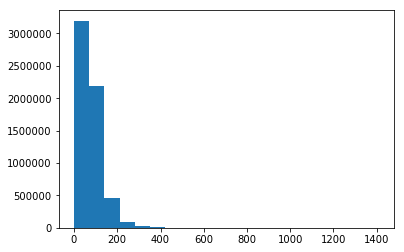

In [29]:
plt.hist(sent_len, bins=20)

In [106]:
review_len = []
for review in tqdm(stemmed_review):
    sents = split_to_sent(review)
    review_len.append(len(sents))

100%|██████████| 980608/980608 [02:21<00:00, 6952.83it/s] 


(array([  9.69267000e+05,   1.00900000e+04,   9.60000000e+02,
          1.83000000e+02,   6.20000000e+01,   2.20000000e+01,
          3.00000000e+00,   7.00000000e+00,   6.00000000e+00,
          8.00000000e+00]),
 array([   1. ,   29.7,   58.4,   87.1,  115.8,  144.5,  173.2,  201.9,
         230.6,  259.3,  288. ]),
 <a list of 10 Patch objects>)

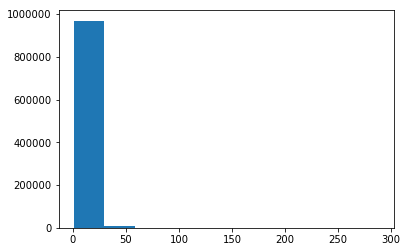

In [107]:
plt.hist(review_len)

In [101]:
for i, review in tqdm(enumerate(stemmed_review)):
    sents = split_to_sent(review)
    if len(sents) > 200:
        print(i)
        print(review)
        print('============')

134163it [00:25, 5232.28it/s]

133616
Paul Harvey was a great man.  He was a pioneer in radio broadcasting especially in regard to the talk radio genre.  He was a decent person.  One of the "good guys."  In 2005, President George W. Bush awarded Mr. Harvey the Presidential Medal of Freedom.  And  recently he passed away. But even great men have flaws.  Paul Harvey had been quoted as saying, "I am fiercely loyal to those willing to put their money where my mouth is."  And therein, lies a conflict of interest. Now, I have no way of knowing whether or not Mr. Harvey knowingly endorsed fraudulent products but it is utterly indisputable that he did endorse the main product of Suarez Corporation Industries. You undoubtedly have never heard of SCI but if you were a regular or even semiregular listener of Paul Harvey you would have heard him endorse the miraculous EdenPURE heater with its revolutionary "cured copper" heat exchanger. SCI is a prime supplier to the multilevel marketing community.  Some of the companies that m

187249it [00:36, 5144.54it/s]

186523
There are a few variations on these presses, some make 12 slightly smaller ravioli, some make 10 slightly larger ravioli. "Ravioli" is plural, there is no word "raviolis", but we're English speakers, so I guess we can say raviolis anyway. Be aware that if you can't afford this right now, there are videos at YouTube that show how to make rav with NO equipment at all. There's a chubby guy who thinks these presses are the best. I got mine at a thrift shop, its ancient, slightly different design from anything they sell today, though it functions identically, but the "presser"(dimpler?) part is also aluminum, there's no plastic. If you can't afford one of these presses(plates) now, you can still make rav. If you don't have a pasta machine, all you need is a rolling pin. If you don't have a rolling pin, go find an empty wine bottle, it can serve as a rolling pin. Learn how to make pasta and ravioli. Then invite me over a lot. Do you think I'm writing this review for fun? I envision a 

241891it [00:46, 5245.27it/s]

241189
If you're an avid reader of reviews at amazon and other websites and cringe when a review of a product is given a One Star rating because of it being 1) Damaged when it arrives; 2) Lost in shipment; 3) Wasn't an iPad (even if it was a water bottle!) or 4) Poor customer service, you're not alone. So, I've structured this review to try and appease most readers. My review begins with "Background", as to WHY I bought this particular 2 pie unit vs. the 4 pie unit and why I bought it from amazon. Skip ahead to Part I if you don't want to know the background.  Part I is the quick and short of it; you want the facts and then you want to move on. Part II is the part that would normally drag a product review down, when it has absolutely NOTHING to do with the physical product but with the Instruction Booklet/Customer Service.  Part III is for the reader that wants/enjoys a more indepth review. This is where I get "chatty", again.  Part IV is the wrapup."BACKGROUND": I've been baking pies 

256004it [00:48, 5402.66it/s]

254989
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

258857it [00:49, 5616.70it/s]

257953
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

311799it [00:58, 5479.04it/s]

310787
I spent over a year researching a wide variety of juicers, and watched more demonstration videos that I could ever count.  Once or twice, I almost wish I never took this dogged challenge because all the facts, comparisons between the various juicers, and advice from others who reviewed their own product spun my head in ways I never thought possible.  And it is because of my extensive research, that I'm posting a somewhat lengthy review, which I will update from time to time as I continue to work this wonderful machine. I originally bought this machine because I planned on juicing hard fibrous vegetables, and my research from various sources showed this to be the best juicer for greens, which best suited my personal needs.  But realistically, it can do so much more. Ironically, even though I bought it for the greens, when writing this review, it is autumn, and grapes are in season, and so I got a bushel of concord grapes from a farm for a great price.  So my first juice wasn't th

378767it [01:08, 7609.19it/s]

377656
OVERVIEW: As a longtime coffee snob I couldn't miss the chance to smackdown these upstart espresso wannabees. Well, more fool me. I was no match for the charms of little miss Pixie; this cheeky wench promptly staked a claim on my valuable counter space, right under the wings of old matron Silvia. BACKGROUND: I've had a Rancilio Silvia V1 for over a decade. Years ago I made the popular PID modification: a computerized thermostat for superior temperature control. I've replaced the boiler, twice, and the steam valve. I've upgraded its overpressure valve and tuned it for optimum steam pressure. I don't just grind my own beans, I buy fairtrade singleorigin 20 pound bulk bags and roast to perfection on a homemade roaster. I make at least four lattes a day, and grind through a pound of coffee a week. To be sure, the PID'ed Silvia is hardly the Rolls Royce of espresso machines, but it is the Toyota Camry: a tried and true performer; a middleofthe road favorite. The Nespresso is the new 

400112it [01:10, 7458.60it/s]

399309
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

425992it [01:14, 7682.08it/s]

424588
Should you get an adjustable bed?  Absolutely.  Being able to adjust your bed is a life changer, plain and simple.  Whether you are old and decrepit or young and active, you will relax more easily and sleep better than you ever have in your life.  If you can at all afford an adjustable bed, GET ONE.  The only question is how much to spend.  If the Prodigy is totally out of your price range, don't despair.  Most adjustable beds are surprisingly reliable (my mom has had one for over 20 years with no problems), and from what I've read, most people are extremely happy with whatever model they get. My husband and I thought about getting Leggett & Platt's SCape model, which we found for about $400 less than the best price we found on a Prodigy (in a split king), but we talked ourselves into getting the Prodigy for many reasons. WEIGHT CAPACITY AND SOUNDThe SCape can be purchased with either a quieter DC motor with a 450pound weight limit (per side) or an AC motor, which is a lot noisi

446379it [01:16, 7862.09it/s]

444987
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

451242it [01:17, 7863.33it/s]

450084
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

460237it [01:18, 7639.41it/s]

458853
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

599732it [01:36, 7889.16it/s]

598734
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is then filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor, folks. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere,

726141it [01:51, 8077.12it/s]

725167
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

878512it [02:09, 7915.64it/s]

877655
"One chews coffee beans while gargling 200 F water for four minutes; pressing with the tongue, coffee is filtered through the teeth: is this the French press you refer to?"  M. PythonAN INTRODUCTION TO COFFEE AMBROSIA. It's a quest for flavor. It's all about flavor. You are here searching for the best quality French Press, one that delivers the most flavorful coffee possible. You might be new to French Press and are rightly skeptical about the vulnerability and safety of a glass model. Or, you might be experienced, a Bodum or BonJour refugee exasperated by having to replace your second, or third, or even your seventh broken glass beaker. No cuts? Lucky you. Been there. Below: First is a look at buying a French Press, followed by a Review of the Frieling French Press, then info on grinders, accessories, buying coffee, and brewing the best French Press. SHOPPING FOR A FRENCH PRESS: WHAT TO LOOK FORFIRST, WHAT IS FRENCH PRESS? Call it French Press, Press Pot, Cafetiere, Plunger Pot

904771it [02:12, 8111.60it/s]

903244
Even though I was wild over the fact that I was going to have a Roomba 880 cleaning my house, it wasn't love at first sight.  In fact, for a while I was quite disgusted with the whole process.  What I needed to do was take my time and learn to work with the Roomba and get to know its capabilities.  After a few weeks we've both settled in and things are working out quite nicely.  Fabulously actually. My mistake was expecting more of the Roomba 880 than perhaps it was capable of.  There were things I needed to learn about from working with the Virtual Wall / Lighthouse to maintenance.  I didn't think I needed the Virtual Wall, but once I figured out how to use it I was quite pleased with the result. For several days I was not a happy camper.  In the back of my mind I was thinking that if the Roomba 880 was a maid, he or she would be taking a hike.  I ran up and down the stairs checking on the cleaning progress, which appeared to be between zero and none.  the darn thing seemed to 

980608it [02:21, 6938.67it/s] 


In [113]:
max_len_review = max(review_len)

NameError: name 'review_len' is not defined

In [26]:
for i, review in tqdm(enumerate(stemmed_review)):
    sents = split_to_sent(review)
    for sent in sents:
        if len(sent) > 1200:
            print(i)
            print(review)
            print('--')
            print(sent)
            print('============')

30281it [00:03, 9889.52it/s]

29250
We all read these reviews and half believe them...but...I hope the people serious about a superior product will listen..I purchased the Simac from Italy (not Amazon) it burned out and failed after 4 mo..a 600.00 machine..absolute h and back to get a small refund and warranty service finally just gace up...be careful who you buy from...went without a machine for over 3 mo as I didn't want to get burned again by poor service had already wasted hundreds didn't want to spend another 600.00 although the Musso looked tempting I wouldn't be able to remove the bowl...couldn't stand that..and wanted a better than good quality nachine under around 300......soo...got my courage up and ordered the Lello pro..let me tell you..fast delivery great price and the quality of the ice cream is exactly the same as the Simac..the machine is much user friendly the bowl has a handle that lifts out important for arthritic people and the buttons are easy to use and see..the noise is about med I keep mine 

117121it [00:13, 9193.26it/s]

115906
bueno por donde comenzar , yo soy un chef casero y mis dos anteriores set de cuchillos eran un tramontina butcher series que de verdad me fue muy util por muchos , pero que un dia luego de ver y usar un santoku forjado marca mundial (otra muy buena marca brazilera) cambio mi manera de ver mis viejos pero muy fieles cuchillos,en vista de eso decidi utilizar un set que tenia guardado y que nunca antes habia utilizado,este es un set grand maitre de wenger,en realidad son cuchillos muy livianos pero hacen el trabajo bastante bien (estos son suizos)pero igual sentia ese vacio en mis manos,en fin luego de buscar por muchas horas en internet y buscar la mejor relacion preciovalorcalidad,halle este set a un precio de verdad muy bueno ,desde ese momento todo en mi vida cambio,tratare de ser breve en la descripcion ,es el mejor set de cuchillos que jamas he tenido,el balance es perfecto,el peso ideal,el filo peligrosamente adictivo,esteticamente son una obra de arte,si buscan algo de lo q

138824it [00:16, 8776.87it/s]

137762
I gave this product a three only because it takes a really long time to dry but baby once it gets hot...its all uphill from there...lol..it holds a nice amount of laundry and if you need some extra heat in the house trust me this will heat a large room nicely..it has a stand where you hang the clothes on and at the bottom is the heating unit..then once you have put all the clothes you want to dry on the stand you then put the insulating bag over the clothes and the stand for the desired amount of time, zip it up and that's it...for lighter clothes one cycle of 120 or a little less will probably be more than sufficient but for heavier clothes you may need to do 2 cycles of 120 minutes to get everything dry..its important to shake the clothes good before placing them on hangers and putting in dryer..it will save you on ironing trust me..the best thing you can do for yourself is to purchase a spin dryer along with this...its a necessity, not an option trust me it makes things a mil

177506it [00:20, 8517.95it/s]

176151
Be warned: this is a LONG review (didn't realize HOW long when I first wrote it!), since I tried to hit all the main points of the Kaldi, but I'm hoping the surplus of info on each point proves helpful! Update I recently discovered that my local bed bath and beyond now carries these capsules (Virginia Peninsula region), which clearly makes it much easier to restock my favorite flavors. I was also happy to see that the capsules now include at least three new flavors: Hazelnut (regular and decaf), Butterscotch Toffee, and French Vanilla, all three being mildstrength flavored coffees. Additionally, I saw that the packaging has been changed on the French Vanilla and Dutch Cocoa powders, indicating to me that CBTL intends to continue to make these available, and push this product line. I consider that to be a GOOD thing, since this machine and the products that go with it provide a nice variety of hot beverage flavors!The CBTL Kaldi is the first singlecup brewer that I've owned from 

327912it [00:37, 10174.95it/s]

326182
First off ..yes this really has a strong chemical smell to itI left it to air out in garage for a weekthen in the basement for another week before putting it on the bedreally helped to get the smell out of it before useHave been using it now for several monthsHonestly it took some getting used to it in the beginningI nearly took it off because i could not stand it the first few nights was not what i was expectingI guess i was hoping to just fall in love with it right away and not have any issues anymore falling asleep at nightbut was not the case right away however has become easier over time to be able to sleep on my bed againtook my body a little bit to get used to it and now i do like it and have not taken it off the bedbefore my bed was actually much too soft for me yet this somehow has made it so thati no longer wake up with such awful back aches and to me that was the true testthe mattress we have it on is one with an inch topper built in itand i was still able to find a m

386164it [00:41, 12747.80it/s]


--
Would give it a 4.5 out of 5 stars because its not perfect but it's on top with my other favorite vacuum brands Miele and Vorwerk.11/2013PROS: Powerhead with removable brush and and additional small openingmake is easy to clean out pet hair or long hair the powerhead suction is so strong on tiles I can see dirt lying 1" next to the head getting sucked in long power cord (I can vacuum our 3 bedroom apartment without unplugging it) use it to clean your car by removing the brush using the hose adjustable height of handle comes with powerhead for lowhigh pile carpet, extra head for hardwood, tile flooring etc, hose extensiontool, couch/upholstery tool sealable bag (when you take it out the dirt stays in the bag) the head moves/swivels so you can get any angle you don't have to bend down super low to wind up the cable (because it's placement it higher than on othervacuums) a warning light turns on if something gets stuck ON/OFF switch & adjustable suction power are located on the handle

473480it [00:48, 12758.93it/s]

471525
This pan to be fair is okay, but I seriously can't figure out all the awesome reviews, I bought this a few months ago and have given it a fair shot, and this pan makes me so mad, and not after all foods, I mean for frying hamburger meat its fine, doing a grilled cheese sandwich yeah it good, my problem is that I do eggs a couple times a week, and regular fried eggs are even okay, but when I do scrambled eggs, I have to soak this pan for 2 days, to get the little circle grooves on the bottom of the pan clean, and that is what makes me hate this pan, yeah I could just get a different pan to do the eggs, but I want one pan to do all, I do in home childcare and cook everyday morning noon and night at home, really I think if this pan didn't have the groves on the bottom,it would be fine, but it is definately not comepltely nonstick, eggs are my biggest test of nonstick, and it failed, I follow every rule of the pan as well, I never cook over med heat, I always heat it up with a small

535495it [00:53, 13215.00it/s]

533060
I love this little numbersooo handy to have on hand for those little messes and days where i do not want to lug out the big onewe have indoor outdoor carpet in our kitchen and dining areaand it is extremely hard to maintain with our big familyi got this to try out if would help the daily little food dropsoh it has been a life savertook a little while to get used to iti was trying to force it too muchso learned to let it guide me almost like a self propelled lawn mowerthat kind of movementand the ability to have the hand held oh how i love that for the nooks and crannies on the stairsthis vacuum is used daily for uswe just make sure to place on the charger when not in useso it is always ready when we need ityes the suction could be a little better but i realize for what this is a stick vac it really seems powerfuli am always emptying the dirt out so i know it is picking up plentyi love that it is easy and light enough for the kids to get outand clean up their art supply spillsgli

661382it [01:02, 13775.08it/s]

659271
Some of the dining room chairs from the set purchased by my parents were sadly worn and I decided to buy these Armen chairs  oddly enough, although I ordered two sets on the same day, the first set was delivered by FedEx  they are a neutral cream color and fit nicely with any d&eacute;cor  I did find that the seat height is higher than my old dining room chairs so I (5' 3") have to sit towards the front of the seat in order to have my feet flat on the floor  however, my son is happy as at 5' 11", he can take full advantage of the lumbar support of the tall chair back Unfortunately, the second set of chairs was delivered by UPS  I gather that FedEx put the box containing the chairs in a larger cardboard box and while one side of the outside box was ripped, the box inside was not damaged at all  UPS just delivered the chairs in their original packing box and that was ripped in several places  when we moved the box into my living room, I could hear tinkling and when we opened the b

676021it [01:03, 13873.97it/s]

674334
It has good suction ,seems functional but not an outstanding vacuum .You can't vacuum under furniture because the plastic container that you empty is to big. The cord does not stretch out straight enough so you have to contend with the cord curling .I find I have to empty the plastic container after each vacuuming ,and when you press the button to rewind the wire it sometime wont rewind all the way .It is quite powerful and I find a lot of the carpet fibers in the container,still for $104 it is a good buy .I had an older Panasonic with bags ,had to clean out the filter and make sure the bag wasn't full .It had started to shutdown because it overheated .I think vacuum cleaners have become a throwaway item ,no point fixing them at this price .4/21/2014An update the darn thing shut down .My wife empties it each time ,but as I took it apart I found it hopelessly clogged .I had to take the plastic enclosure down to my workbench to pull out this clear plastic insert which was jammed w

791499it [01:11, 14131.74it/s]

789080
this is a great easy machine to use that works great!i have used various stick vacs and this one beats them all by mileit charges easily and fast and holds the charge for a really long timei have a 3400 sq foot house with thick and thin carpet and ceramic tilei have used this on every surface in the house with easeso easy to use my 9 year old uses itour kitchen and breakfast nook has the indoor outdoor kind of carpetand i LOVE this machineit save so much time daily to clean the kitchen floors and not have to lug out the big beastalso this machine is the only one i have been able to use on the rugs under our dining room tablein fact i can use this one half on the run and half on the carpet under the rugit goes from one surface to another without any problems at alli am able to easily do the entire downstairs and upstairs hall including stairs in one chargethe slim design fits inside the hall closet out of sight once i am donehard to do with my bigger machines and i LOVE no cords 

811943it [01:13, 13389.82it/s]

810347
The uurtain is beautiful lilac  was so disappointed I had purchases shower hooks and on the ends are little round balls for designing purpose and the balls are too large and you cannot use with this curtain.....I purchased another set here in town  looked like them onlhy smaller in the store, but when I got them home  same thing  too large for this particular curtain.  So I have a probllem for I opened the curtain  as I said it is gorgeous  and no way I can fold it back the way it was .....however it too is so beautiful  the color I will save and later maybe when I get new shower hooks I will be sure it will fit this particular shower liner.....it is of excellent quality  heavy  it would have been beautiful with the lace shower curtains  however washing my old fabric liner which I bought at AMAZON  in white  it came out like brand new  and this white I was surprised  my bathroom which has no window  looks so bright  and I love it  both curtains and liner were from an exellent se

850358it [01:16, 13491.56it/s]

848611
I wanted to wait a while before I reviewed the 6 in l Programmable Pressure Cooker as I have been experimenting with it every day. I really love it and enjoy using it. Everything I have made has come out fabulous...I finally retired my old stainless steel pressure cooker after 15 years and the difference between my Instant Pot and the old way of pressure cooking is like day and night...The old one I just realized turned everything into mush ( various soups) after around 20 minutes or less of required cooking and I was used to it but the 6 in 1 is so much better...Thus far I have steamed asparagus amd artichokes to perfection, as well as brussel sprouts, potatoes and pears...I made chicken soup (with the regular soup setting) as well as Greek Lentil soup last night, and all have been delicious...with soft vegetables that still had definition to them, not all mushed up.....the only problem I experienced thus far was charring a pork roast and the bottom of the pot was burned but af

980608it [01:25, 11508.07it/s]


In [109]:
def convert_to_input(data_over_n):
    """
    convert original review data to tensorflow input data
    Args
        data_over_n (dataframe): Amazon review data 
    Returns
        input_ (dict): reviewerID as key, list of related attributes (asin, reviewText) are values 
    """
    input_ = dict()
    for i in data_over_n.itertuples():
        reviewerID, asin, reviewText, unixReviewTime, reviewTime = i[1], i[2], i[5], i[8], i[9]
        reviewSents = split_to_sent(reviewText)
        if len(reviewSents) < max_len_review:
            reviewSents.extend(["ㅁ"]*(max_len_review-len(reviewSents)))
        if input_.get(reviewerID):
            input_.get(reviewerID).append({'asin': asin, 'reviewText': reviewSents, 'unixReviewTime': unixReviewTime, 'reviewTime': reviewTime})
        else:
            input_[reviewerID] = [{'asin': asin, 'reviewText': reviewSents, 'unixReviewTime': unixReviewTime, 'reviewTime': reviewTime}]
    return input_

In [30]:
data_over_n['reviewText'] = stemmed_review

In [31]:
data_over_n.shape

(980608, 9)

In [110]:
data = convert_to_input(data_over_n)

In [111]:
for k, val in data.items():
    print(k, val)
    break

A14UQBG3HNR785 [{'asin': 'B00002SAO2', 'reviewText': ['At first I thought that this would be a fun game.', 'After a while, it got very tiresome and the parrot was so annoying.', 'I found a few of the puzzles almost impossible to solve, and ended up needing 2 spoilers.', "The graphics are OK, but it doesn't hold a candle to Myst or Riven.", 'Overall, if you have nothing better to do with your money, and have nothing else to play, then go for it.', "But if you want something REALLY good, you haven't found it yet.", 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', 'ㅁ', '

In [60]:
if len(set(data.keys())) == len(set(data_over_n.reviewerID)):
    print("preprocessing is well done!")

preprocessing is well done!


In [112]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)